### SARIMA 

In [1]:
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
from pandas import datetime
from random import random
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.ar_model import AR
import warnings
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

warnings.filterwarnings('ignore')

from pandas import read_csv
from matplotlib import pyplot

from math import sqrt
import numpy

### Carica dati 

In [2]:
data = pd.read_csv('/Users/Alket/Desktop/dati/new_data_backfill_forwfill.csv',index_col = 0)
gbc = data.groupby(by = data['cell_num'])
cell_1 = gbc.get_group('486-1258')
cell_2 = gbc.get_group('498-1268')
cell_3 = gbc.get_group('488-1264')

In [3]:
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat
 
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)
 

X = cell_3['nr_people'].values
size = len(X) - 4000
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
expected = list()
for t in range(len(test)):
    model = sm.tsa.statespace.SARIMAX(history, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=False)
    ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
    resid = model_fit.resid
    diff = difference(history)
    yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    expected.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

>predicted=312.905, expected=306.000
>predicted=308.020, expected=307.000
>predicted=308.587, expected=307.000
>predicted=308.080, expected=333.000
>predicted=339.242, expected=344.000
>predicted=350.581, expected=356.000
>predicted=363.023, expected=356.000
>predicted=360.779, expected=368.000
>predicted=373.796, expected=370.000
>predicted=374.368, expected=389.000
>predicted=396.001, expected=399.000
>predicted=405.886, expected=420.000
>predicted=429.141, expected=421.000
>predicted=427.435, expected=414.000
>predicted=416.895, expected=412.000
>predicted=413.544, expected=410.000
>predicted=410.625, expected=424.000
>predicted=427.394, expected=433.000
>predicted=437.217, expected=441.000
>predicted=445.566, expected=446.000
>predicted=450.168, expected=458.000
>predicted=463.380, expected=458.000
>predicted=461.663, expected=479.000
>predicted=485.943, expected=507.000
>predicted=517.666, expected=507.000
>predicted=514.262, expected=529.000
>predicted=538.610, expected=528.000
>

>predicted=513.779, expected=508.000
>predicted=511.936, expected=515.000
>predicted=519.163, expected=515.000
>predicted=517.835, expected=517.000
>predicted=519.354, expected=517.000
>predicted=518.604, expected=539.000
>predicted=544.743, expected=539.000
>predicted=542.915, expected=551.000
>predicted=556.204, expected=551.000
>predicted=554.548, expected=538.000
>predicted=537.671, expected=525.000
>predicted=522.022, expected=519.000
>predicted=515.701, expected=515.000
>predicted=511.907, expected=515.000
>predicted=512.894, expected=514.000
>predicted=512.355, expected=518.000
>predicted=517.726, expected=510.000
>predicted=508.121, expected=510.000
>predicted=508.720, expected=496.000
>predicted=492.168, expected=490.000
>predicted=486.121, expected=491.000
>predicted=488.570, expected=474.000
>predicted=468.749, expected=459.000
>predicted=452.249, expected=456.000
>predicted=450.768, expected=450.000
>predicted=445.167, expected=449.000
>predicted=445.497, expected=449.000
>

>predicted=465.610, expected=460.000
>predicted=455.799, expected=464.000
>predicted=461.957, expected=464.000
>predicted=462.601, expected=462.000
>predicted=460.624, expected=449.000
>predicted=445.345, expected=449.000
>predicted=446.495, expected=449.000
>predicted=447.284, expected=405.000
>predicted=394.651, expected=397.000
>predicted=388.237, expected=384.000
>predicted=375.280, expected=368.000
>predicted=358.683, expected=354.000
>predicted=344.690, expected=344.000
>predicted=335.530, expected=336.000
>predicted=328.524, expected=330.000
>predicted=323.623, expected=330.000
>predicted=325.630, expected=304.000
>predicted=295.577, expected=301.000
>predicted=294.595, expected=302.000
>predicted=297.815, expected=302.000
>predicted=299.131, expected=294.000
>predicted=290.363, expected=294.000
>predicted=291.505, expected=294.000
>predicted=292.289, expected=277.000
>predicted=272.285, expected=276.000
>predicted=272.555, expected=281.000
>predicted=279.677, expected=298.000
>

>predicted=287.469, expected=272.000
>predicted=269.175, expected=269.000
>predicted=266.441, expected=269.000
>predicted=267.251, expected=269.000
>predicted=267.805, expected=285.000
>predicted=287.538, expected=285.000
>predicted=286.734, expected=310.000
>predicted=316.430, expected=315.000
>predicted=320.441, expected=323.000
>predicted=328.396, expected=335.000
>predicted=341.205, expected=350.000
>predicted=357.388, expected=359.000


KeyboardInterrupt: 

### Calcolo dell'errore

MSE  8.004809960029935


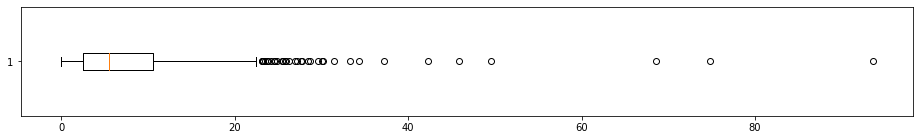

In [4]:
error = abs(np.array(predictions) - np.array(expected))
print('MSE ', error.mean())

plt.figure(figsize=(16, 2))
plt.boxplot(error, vert = False);
plt.show()

In [21]:
cell = '488-1264'
dict2data = {}
minimum = np.amin(error)   
per75 = np.percentile(error, 75)
per50 = np.percentile(error, 50)
per25 = np.percentile(error, 25)
maximum = np.amax(error)
l5i = [minimum, per25, per50, per75, maximum]
dict2data[cell] = l5i

with open('error_data_4_cell_488-1264_SARIMA_param_1.1.1.csv', 'w') as f:
    for key, value in dict2data.items():
        f.write('%s:%s\n' % (key, value))

### Calcolo errore di previsone per ogni cella con SARIMA 

In [9]:
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat
 
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

count = 0
dict2data = {}
dict2MAPE = {}
for i, k in gbc: 
    cell = i
    count += 1
    print(count)
    X = k['nr_people'].values
    
    size = len(X) - 30
    train, test = X[0:size], X[size:]
    history = [x for x in train]
    predictions = list()
    expected = list()
    for t in range(len(test)):
        model = sm.tsa.statespace.SARIMAX(history, order=(1,1,1))
        model_fit = model.fit(trend='nc', disp=False)
        ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
        resid = model_fit.resid
        diff = difference(history)
        yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        expected.append(obs)
        #print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
    #rmse = sqrt(mean_squared_error(test, predictions))
    #print('Test RMSE: %.3f' % rmse)   
    
    error = abs(test - predictions)
    MAPE = np.mean(abs(100*(error/predictions)))
    minimum = np.amin(error)   
    per75 = np.percentile(error, 75)
    per50 = np.percentile(error, 50)
    per25 = np.percentile(error, 25)
    maximum = np.amax(error)
    
    l5i = [minimum, per25, per50, per75, maximum]
    list_i = ", ".join(l5i)
    dict2data[cell] = list_i
    dict2MAPE[cell] = MAPE

with open('MAE_error_data_4_SARIMA_MultistepForecast_26_param_1.1.1.csv', 'w') as f:
    for key, value in dict2data.items():
        f.write('%s:%s\n' % (key, value)) 
        
        
with open('MAPE_error_data_4_SARIMA_MultistepForcast_26_param_1.1.1.csv', 'w') as f:
    for key, value in dict2MAPE.items():
        f.write('%s:%s\n' % (key, value))        

1


TypeError: sequence item 0: expected str instance, numpy.float64 found